In [8]:
import pandas as pd
data = pd.read_csv('/Users/maggiehuang/Desktop/INSY662_Data_Mining_and_Visualization_for_Analytic/INSY662-Data-Mining-and-Visualization-Project/Fire_Incidents_Data_Imputed.csv')

K-Prototypes clustering

In [ ]:
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

# Encode categorical columns
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Standardize numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Prepare data for K-Prototypes clustering
X_kproto = data.values

# Perform K-Prototypes clustering with k=9 (the optimal k)
kproto = KPrototypes(n_clusters=9, init='Cao', n_init=5, verbose=0)
clusters = kproto.fit_predict(X_kproto, categorical=[data.columns.get_loc(col) for col in categorical_columns])

# Add the cluster labels to the dataset for analysis
data['Cluster'] = clusters

# Display the first few rows with the assigned cluster labels
print(data[['Cluster'] + numerical_columns + categorical_columns].head())


NotImplementedError: No categorical data selected, effectively doing k-means. Present a list of categorical columns, or use scikit-learn's KMeans instead.

Find the optimal k

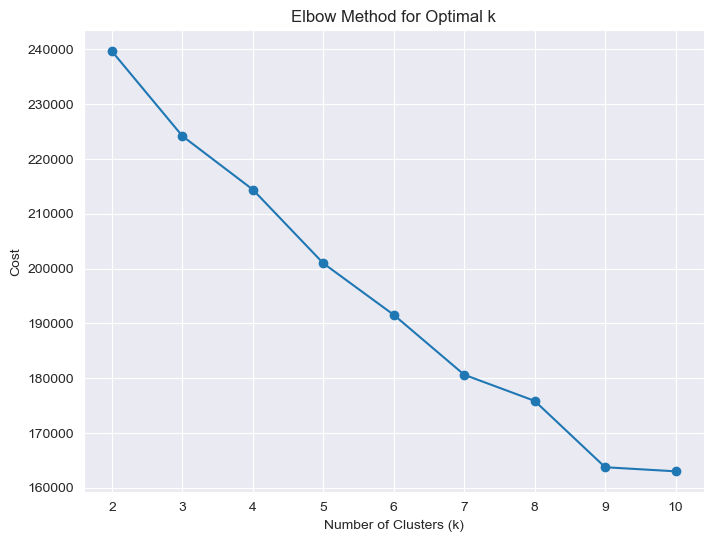

In [ ]:
cost = []
for k in range(6, 13): 
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=5, verbose=0)
    kproto.fit(X_kproto, categorical=[data.columns.get_loc(col) for col in categorical_columns])
    cost.append(kproto.cost_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), cost, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()


Clustering Summary Statistics

In [ ]:
# Reload the original dataset (without scaling)
original_data = pd.read_csv('/Users/maggiehuang/Desktop/INSY662_Data_Mining_and_Visualization_for_Analytic/INSY662-Data-Mining-and-Visualization-Project/Fire_Incidents_Data_Imputed.csv')

# Ensure that `Cluster` labels are merged with the original data for accurate summaries
original_data['Cluster'] = data['Cluster']

# Separate categorical and numerical columns from the original data
categorical_columns = original_data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = original_data.select_dtypes(exclude=['object', 'int']).columns.tolist()  # Exclude integers if categorical

# Initialize a list to store compact summaries for each cluster
cluster_summaries = []

# Loop through each cluster to create a compact summary using original values
for cluster in original_data['Cluster'].unique():
    cluster_data = original_data[original_data['Cluster'] == cluster]
    
    # Initialize a dictionary for the cluster summary with Cluster as the first and Total_Count as the second entry
    cluster_summary = {
        'Cluster': cluster,
        'Total_Count': len(cluster_data)
    }
    
    # Numerical summary: mean of each numerical column using original (unscaled) values
    for col in numerical_columns:
        cluster_summary[f'{col}_mean'] = cluster_data[col].mean()
    
    # Categorical summary: most common category (actual value) for each categorical column
    for col in categorical_columns:
        top_category = cluster_data[col].mode()[0]  # Most common category value
        top_count = cluster_data[col].value_counts().max()
        cluster_summary[col] = f"{top_category} ({top_count})"
    
    # Append the dictionary to the list
    cluster_summaries.append(cluster_summary)

# Convert list of summaries into a DataFrame
cluster_summary_df = pd.DataFrame(cluster_summaries)

print("\nSummary by Cluster:")
display(cluster_summary_df)


Compact Summary by Cluster (Original Scale):


,Cluster,Total_Count,TFS_Response_Time_mean,Geo_Coordinate_mean,Cluster_mean,Area_of_Origin,Building_Status,Business_Impact,Ext_agent_app_or_defer_time,Extent_Of_Fire,...,Initial_CAD_Event_Type,Last_TFS_Unit_Clear_Time,Material_First_Ignited,Method_Of_Fire_Control,Possible_Cause,Property_Use,Smoke_Alarm_Impact_on_Persons_Evacuating_Impact_on_Evacuation,Smoke_Spread,Sprinkler_System_Operation,Status_of_Fire_On_Arrival
0,7,3081,5.197134,90.689180,7.0,24 - Cooking Area or Kitchen (753),01 - Normal (no change) (2620),8 - Not applicable (not a business) (1477),2016-01-16T20:10:00 (2),1 - Confined to object of origin (1567),...,FIR (809),2017-04-03 15:31 (2),"46 - Rubbish, Trash, Waste (323)",1 - Extinguished by fire department (1855),52 - Electrical Failure (425),323 - Multi-Unit Dwelling - Over 12 Units (910),7 - Not applicable: Occupant(s) first alerted ...,2 - Confined to part of room/area of origin (884),8 - Not applicable - no sprinkler system prese...,1 - Fire extinguished prior to arrival (1054)
1,0,3357,5.212848,90.550386,0.0,24 - Cooking Area or Kitchen (1089),01 - Normal (no change) (2935),8 - Not applicable (not a business) (1989),2011-12-21T19:30:00 (2),2 - Confined to part of room/area of origin (1...,...,FIR (1185),2012-10-08 18:56 (2),"74 - Cooking Oil, Grease (510)",1 - Extinguished by fire department (2611),44 - Unattended (593),301 - Detached Dwelling (1046),1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor (...",8 - Not applicable - no sprinkler system prese...,2 - Fire with no evidence from street (1094)
2,3,5031,4.543562,90.593241,3.0,24 - Cooking Area or Kitchen (827),01 - Normal (no change) (4395),1 - No business interruption (2935),2012-04-18T15:22:10 (2),1 - Confined to object of origin (3299),...,FIR (985),2015-01-25 20:40 (2),"46 - Rubbish, Trash, Waste (867)",1 - Extinguished by fire department (2731),45 - Improperly Discarded (990),323 - Multi-Unit Dwelling - Over 12 Units (1748),7 - Not applicable: Occupant(s) first alerted ...,2 - Confined to part of room/area of origin (1...,8 - Not applicable - no sprinkler system prese...,1 - Fire extinguished prior to arrival (2074)
3,1,3691,5.234711,90.726015,1.0,24 - Cooking Area or Kitchen (840),01 - Normal (no change) (3178),8 - Not applicable (not a business) (1745),2011-01-01T11:44:59 (1),1 - Confined to object of origin (1777),...,FIR (1101),2019-11-23 15:40 (2),"74 - Cooking Oil, Grease (385)",1 - Extinguished by fire department (2270),99 - Undetermined (541),301 - Detached Dwelling (914),1 - All persons (at risk of injury) self evacu...,2 - Confined to part of room/area of origin (959),8 - Not applicable - no sprinkler system prese...,1 - Fire extinguished prior to arrival (1253)
4,2,1208,4.915762,90.636712,2.0,24 - Cooking Area or Kitchen (491),01 - Normal (no change) (1138),8 - Not applicable (not a business) (648),2011-01-03T18:31:05 (1),2 - Confined to part of room/area of origin (542),...,FIR (386),2013-05-27 14:17 (2),"74 - Cooking Oil, Grease (256)",1 - Extinguished by fire department (705),44 - Unattended (272),323 - Multi-Unit Dwelling - Over 12 Units (493),1 - All persons (at risk of injury) self evacu...,"4 - Spread beyond room of origin, same floor (...",8 - Not applicable - no sprinkler system prese...,1 - Fire extinguished prior to arrival (436)
5,8,237,4.968059,90.628503,8.0,24 - Cooking Area or Kitchen (31),01 - Normal (no change) (197),8 - Not applicable (not a business) (115),2011-01-08T14:12:32 (1),2 - Confined to part of room/area of origin (56),...,FIR (94),2011-01-08 16:02 (1),99 - Undetermined (formerly 98) (64),1 - Extinguished by fire department (228),99 - Undetermined (66),301 - Detached Dwelling (71),7 - Not applicable: Occupant(s) first alerted ...,8 - Entire Structure (62),8 - Not applicable - no sprinkler system prese...,3 - Fire with smoke showing only - including v...
6,4,225,6.365956,90.637391,4.0,24 - Cooking Area or Kitchen (29),01 - Normal (no change) (178),8 - Not applicabl

Visualize the numerical virables after clustering

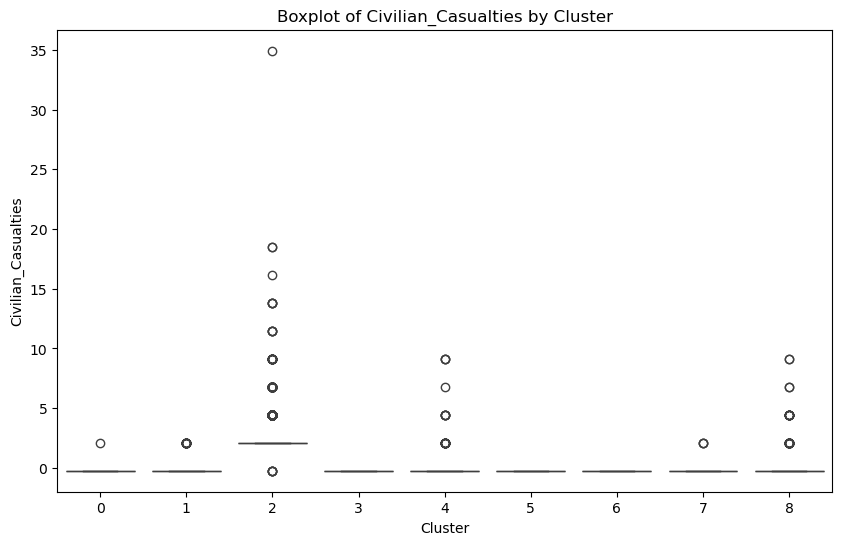

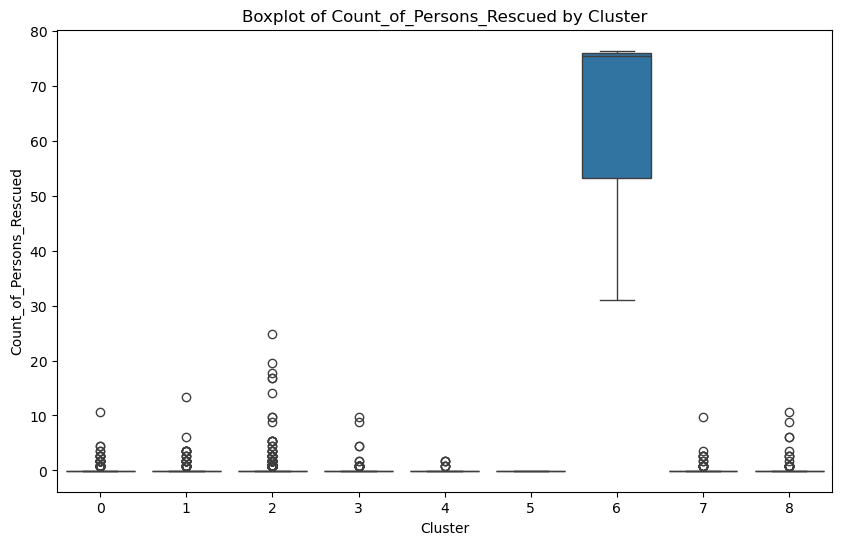

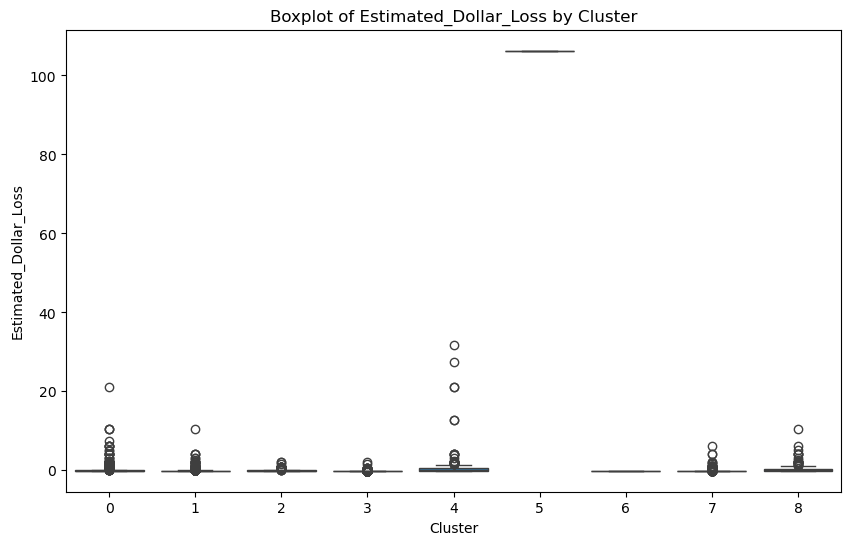

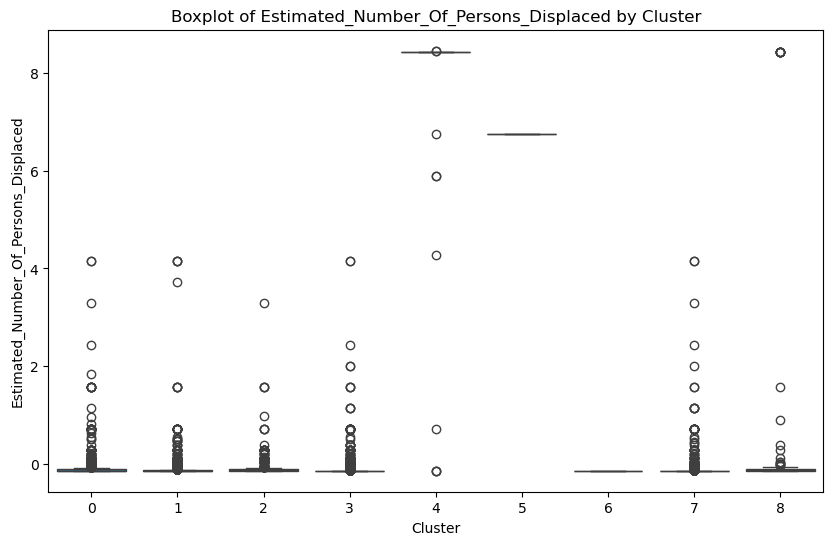

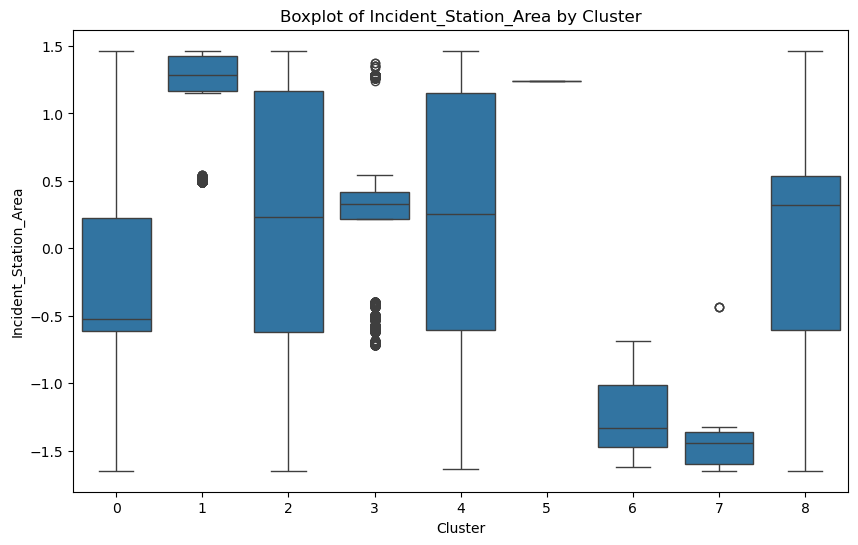

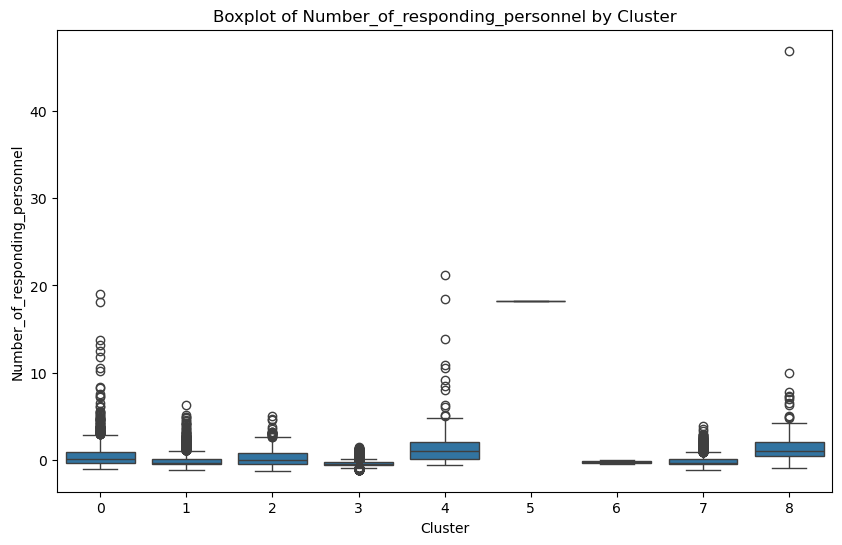

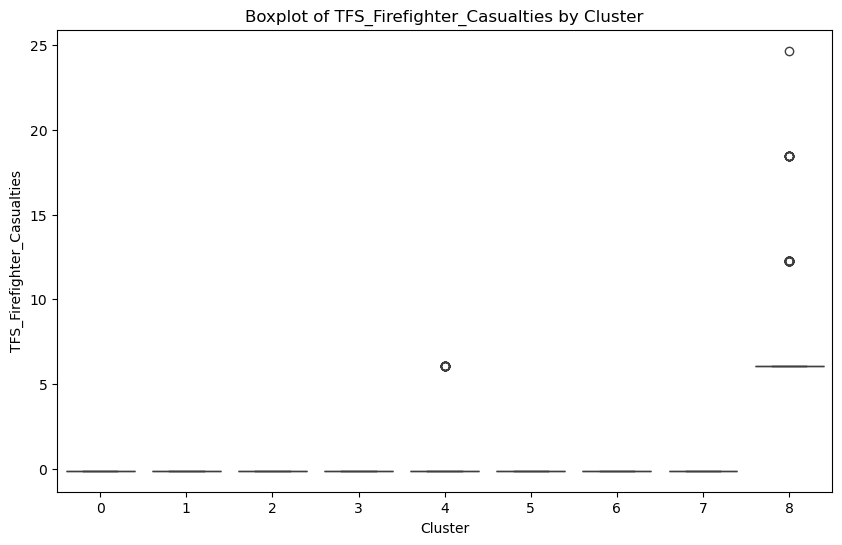

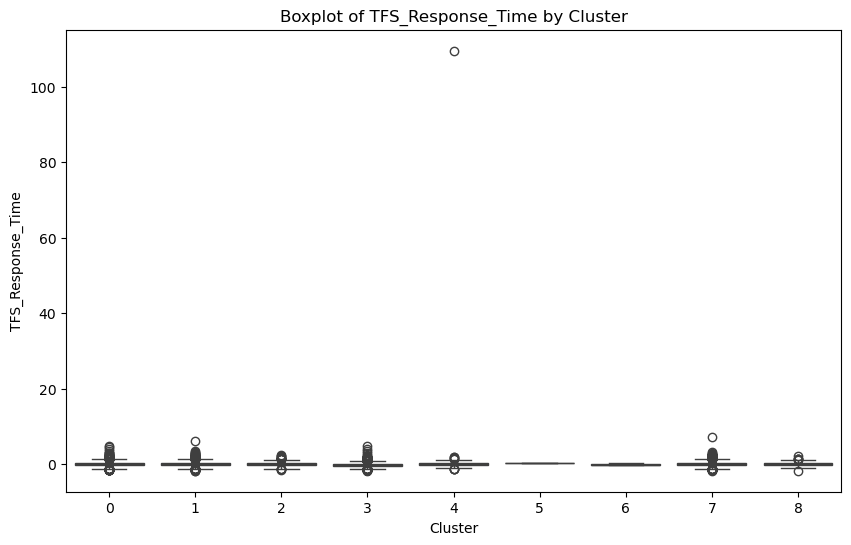

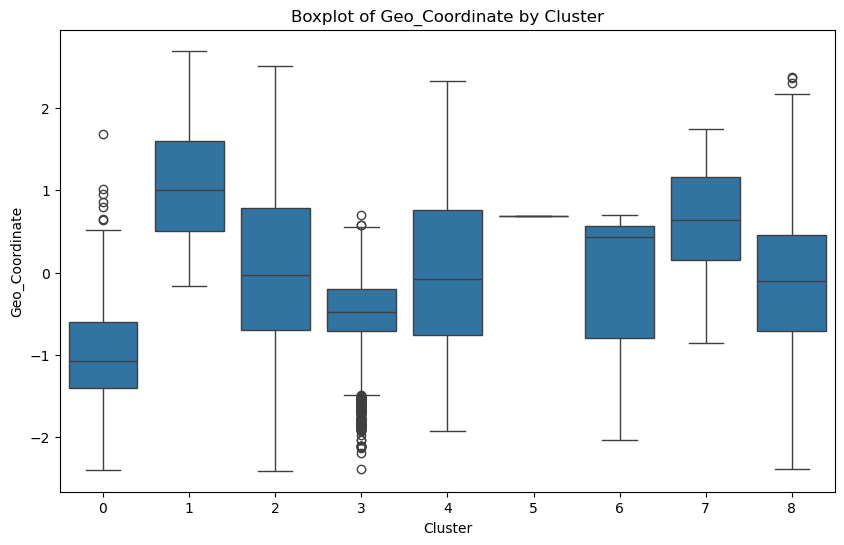

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=col, data=data)
    plt.title(f'Boxplot of {col} by Cluster')
    plt.show()


Visualize the categorical virables after clustering

In [ ]:
# Calculate the mode for each categorical feature within each cluster
mode_by_cluster = data.groupby('Cluster')[categorical_columns].agg(lambda x: x.mode()[0])

# Calculate the proportion of each category in each cluster
# This shows the distribution of categories within each cluster for each categorical column
category_proportion = {}
for col in categorical_columns:
    category_proportion[col] = data.groupby(['Cluster', col]).size().unstack(fill_value=0)
    category_proportion[col] = category_proportion[col].div(category_proportion[col].sum(axis=1), axis=0)

# Display mode and proportion results
print("Mode values of categorical features by cluster:")
print(mode_by_cluster)

Mode values of categorical features by cluster:
         Area_of_Origin  Building_Status  Business_Impact  \
Cluster                                                     
0                     8                0                5   
1                     8                0                5   
2                     8                0                5   
3                     8                0                0   
4                     8                0                5   
5                    73                0                4   
6                    45                0                0   
7                     8                0                5   
8                     8                0                5   

         Ext_agent_app_or_defer_time  Extent_Of_Fire  Final_Incident_Type  \
Cluster                                                                     
0                               1276               3                    0   
1                                  2             

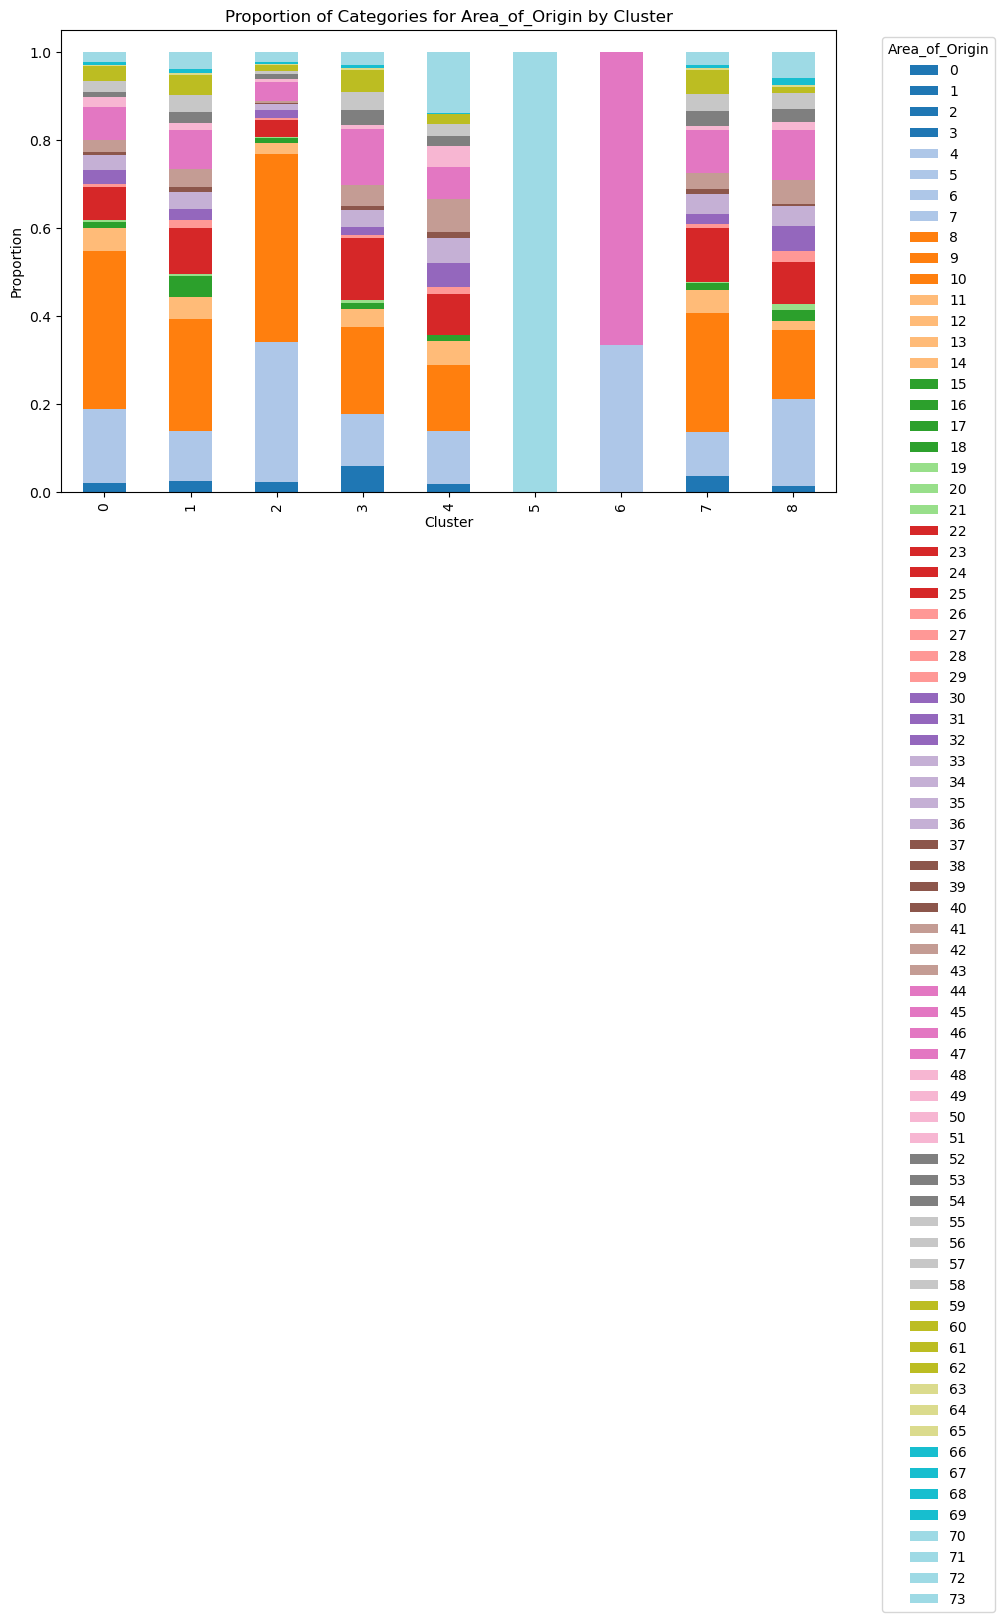

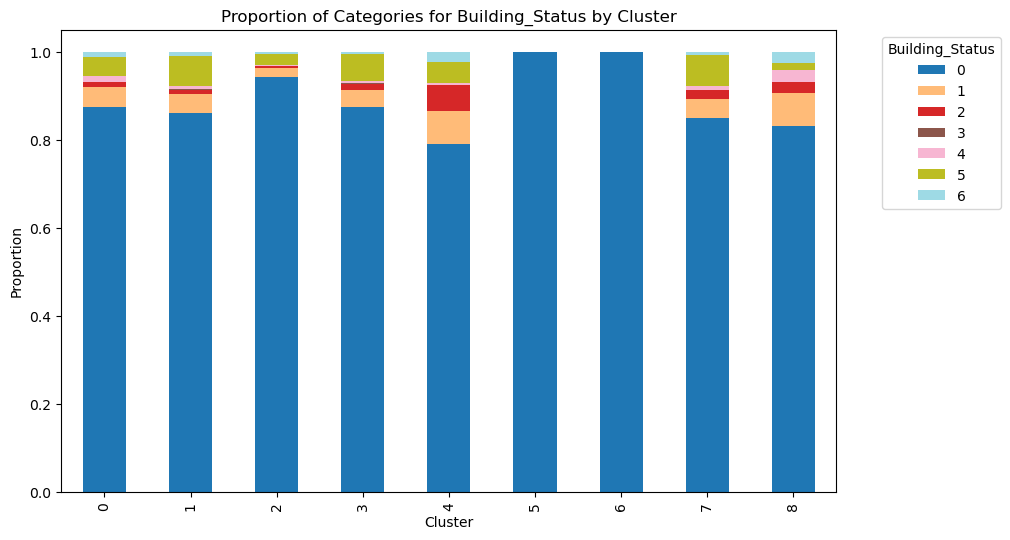

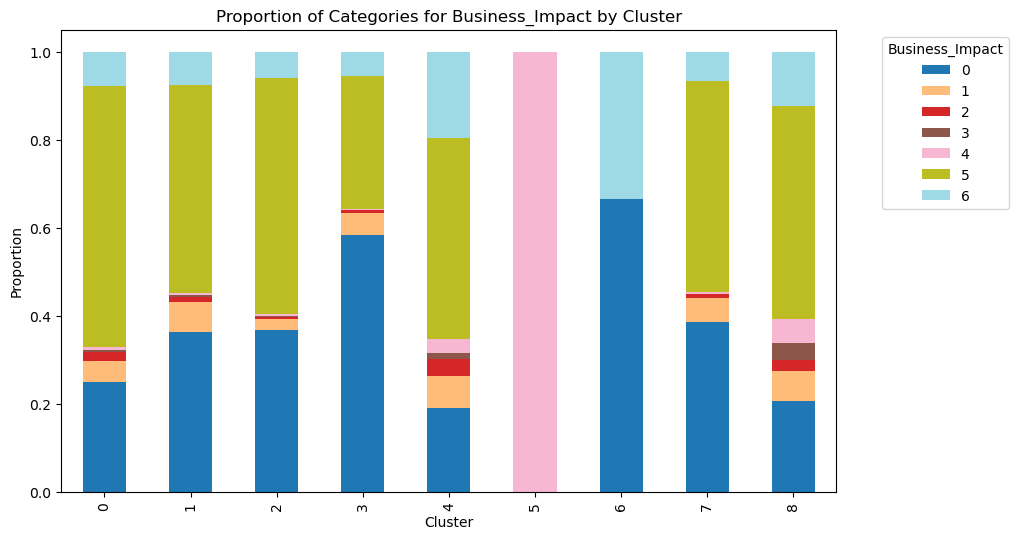

ValueError: Image size of 1109x352546 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

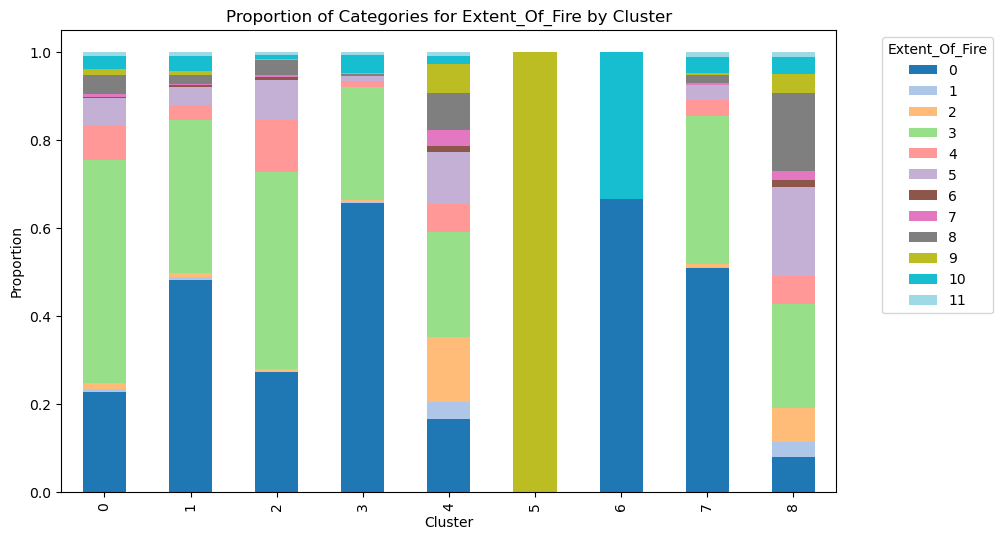

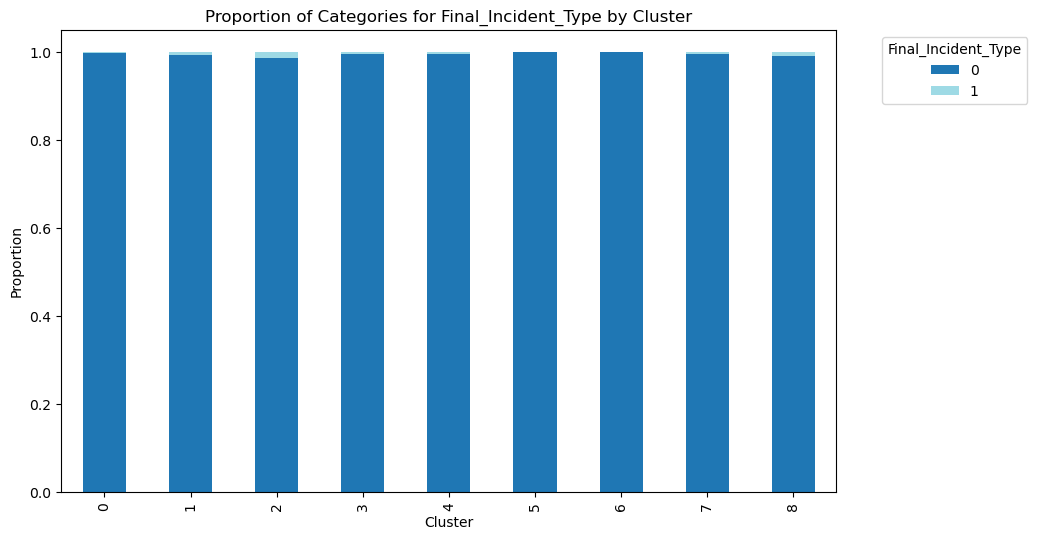

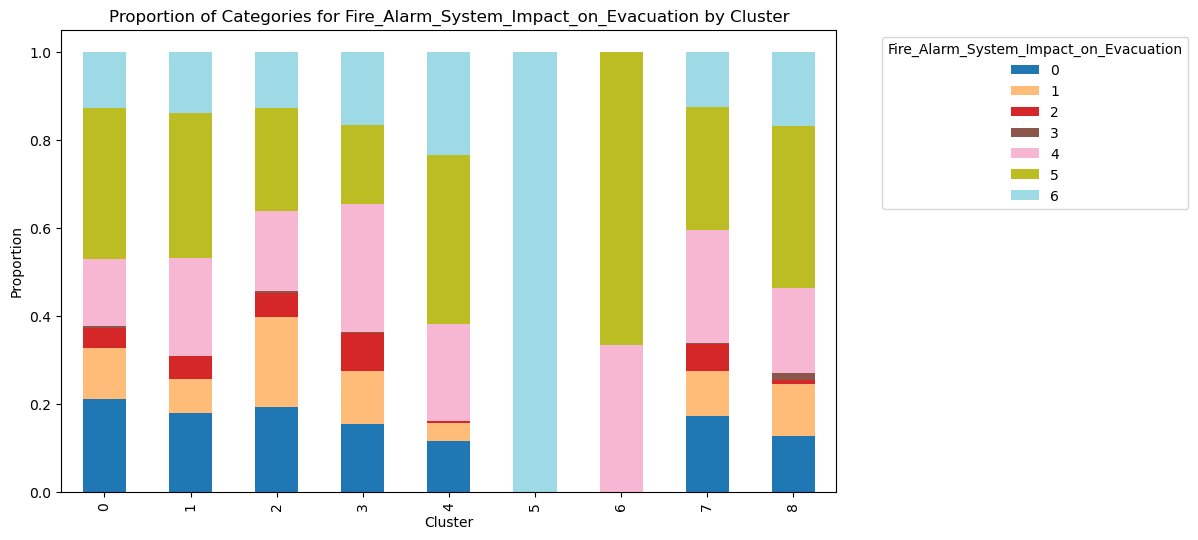

ValueError: Image size of 1075x352441 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

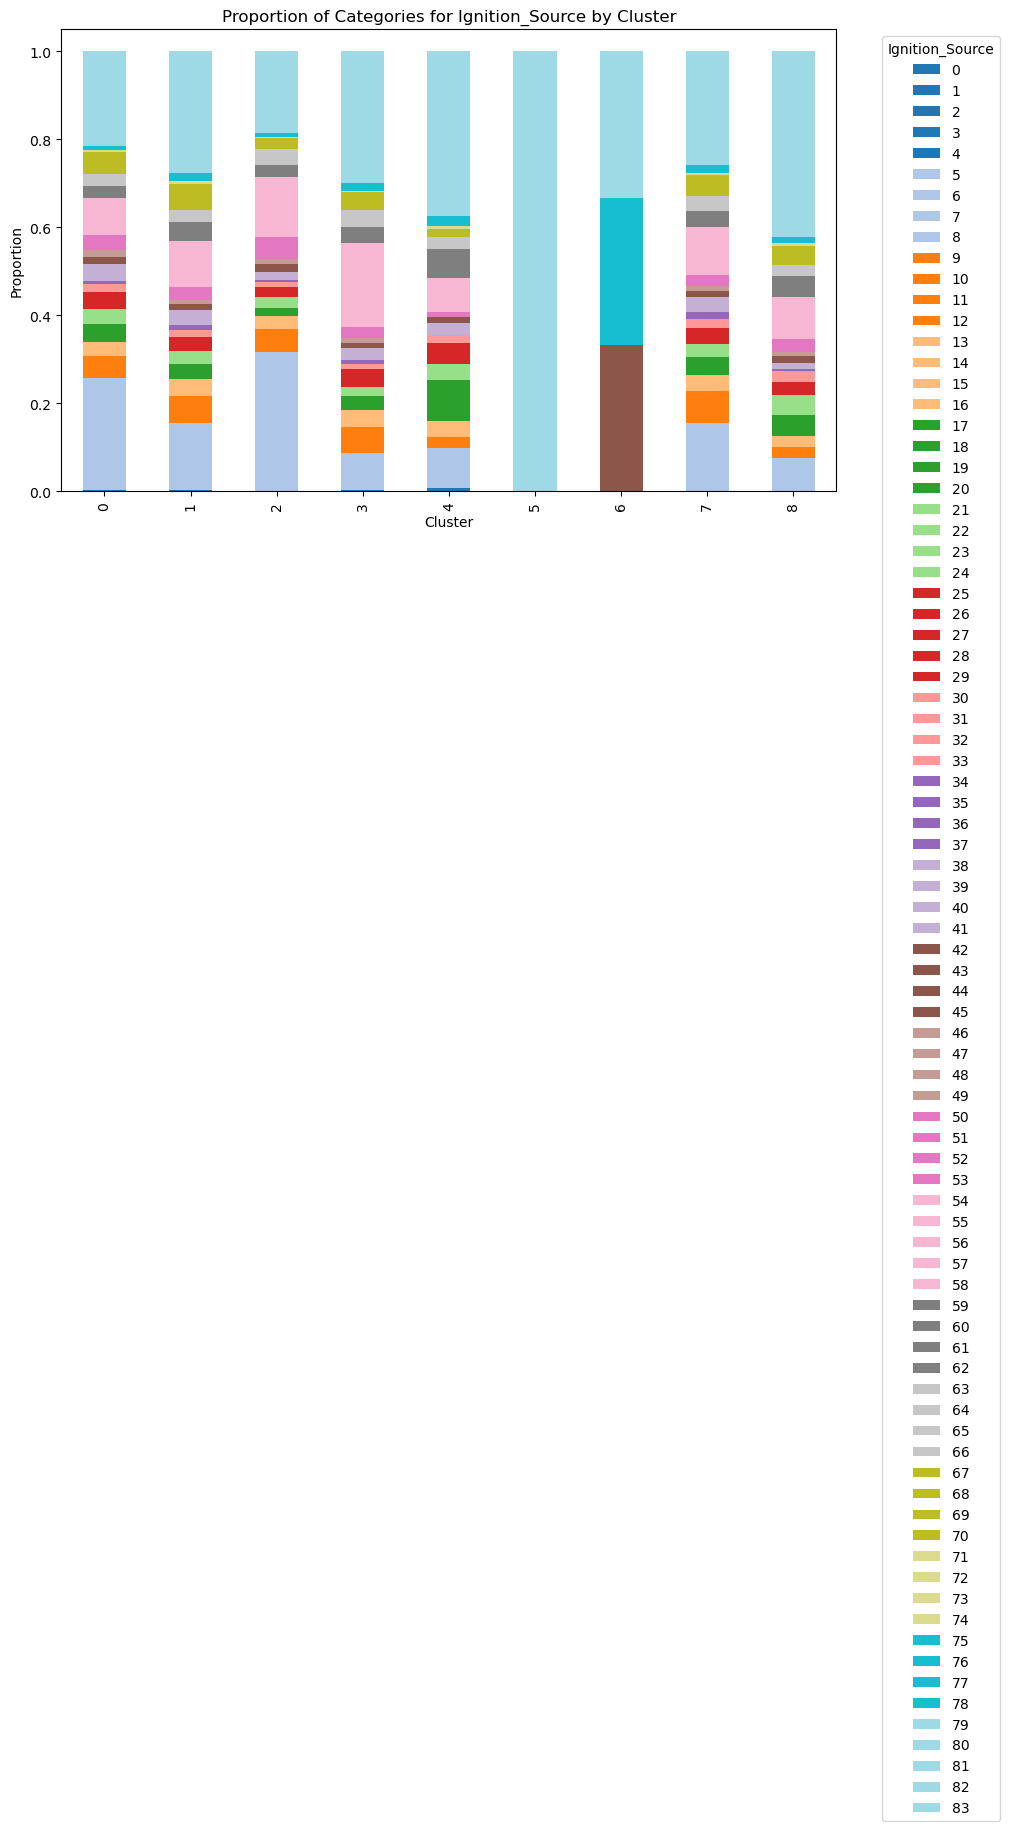

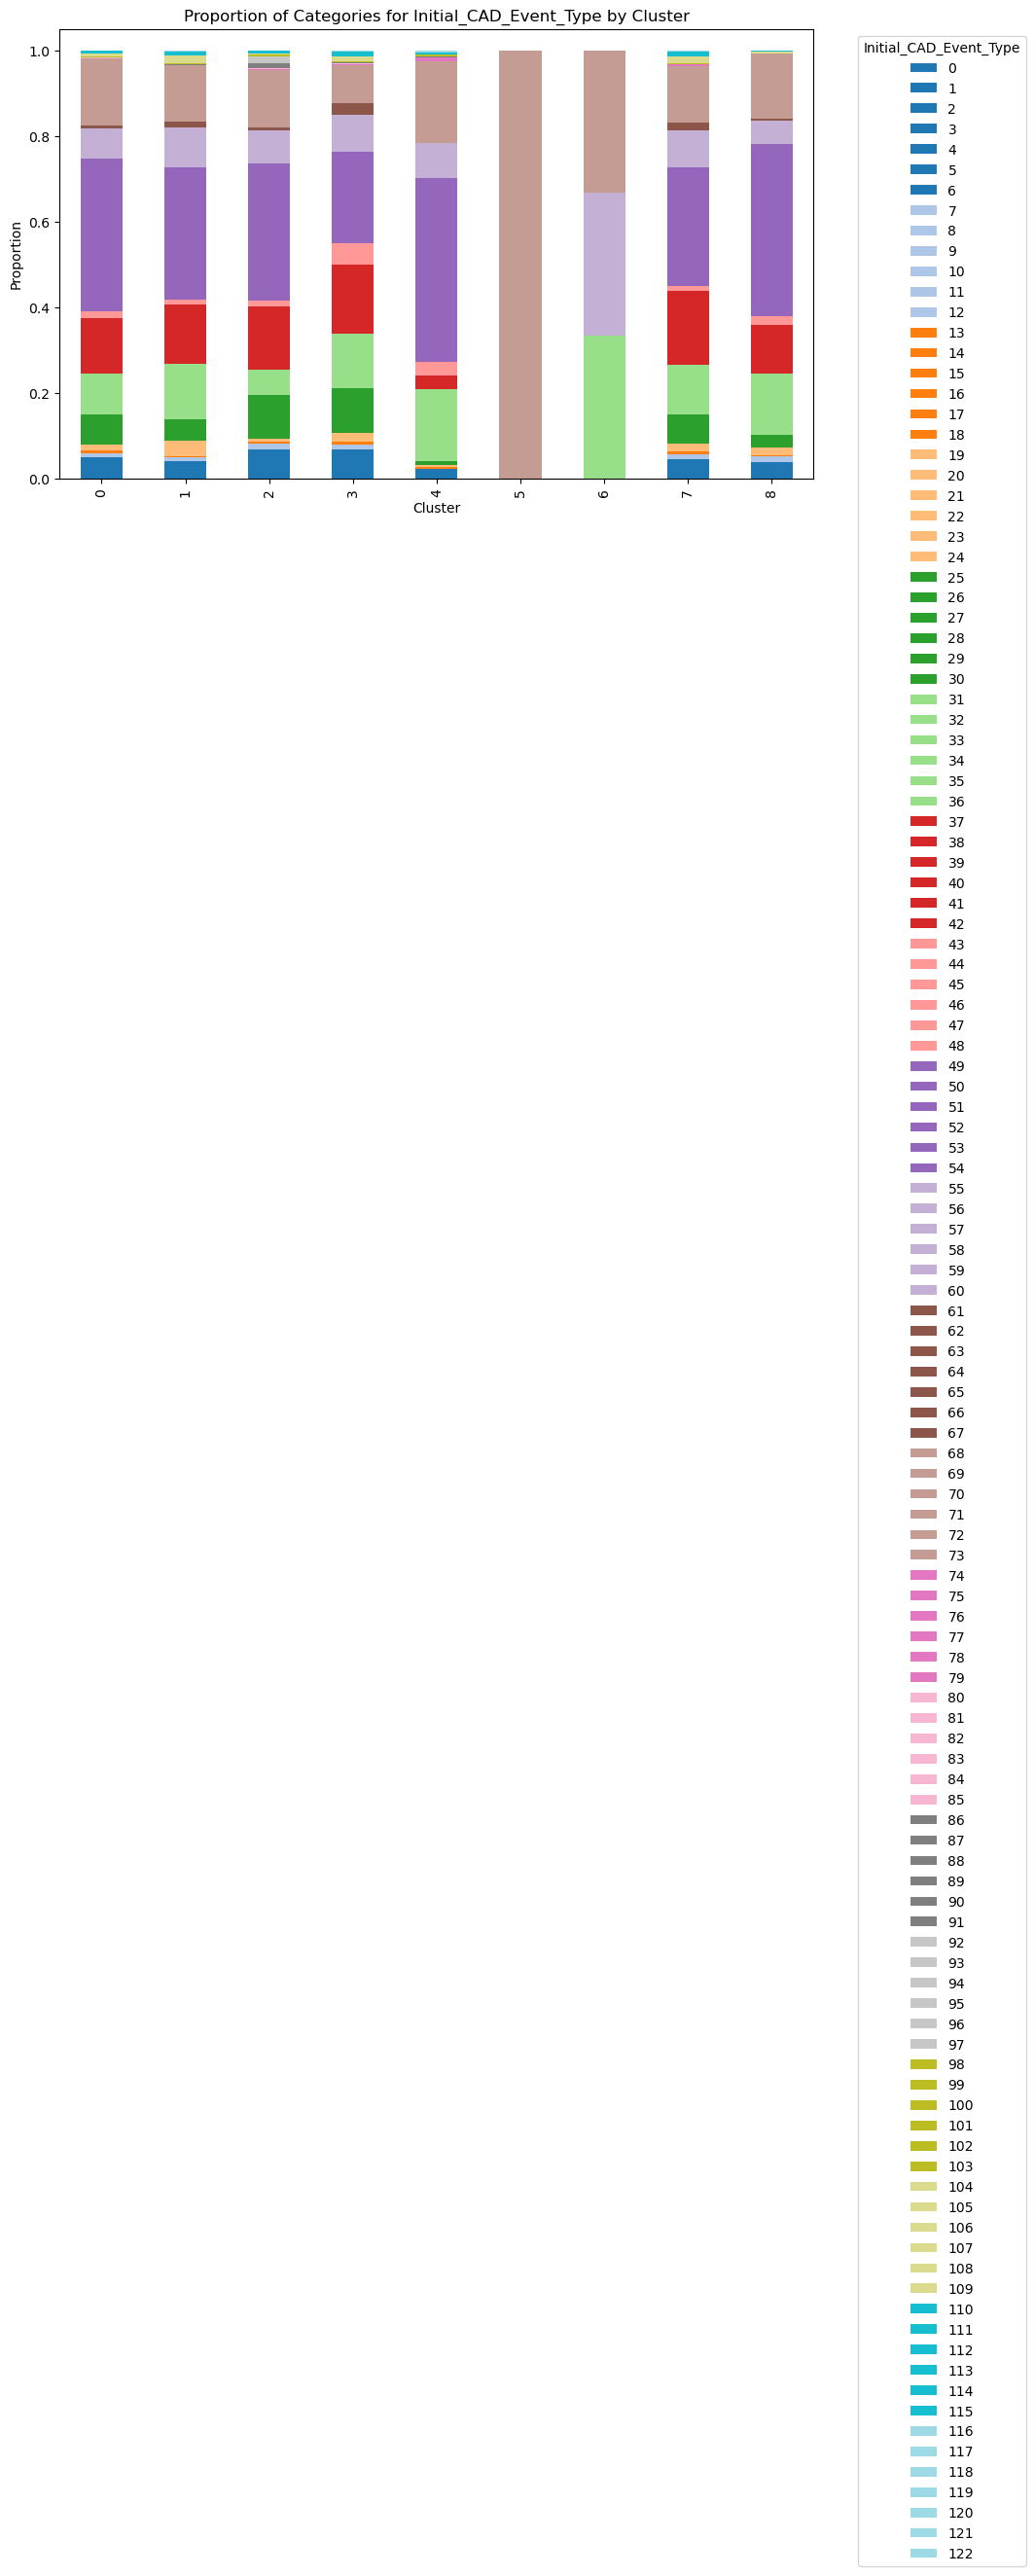

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

# Visualize category proportions for each categorical column
for col in categorical_columns:
    # Get the proportions for each category within each cluster
    prop_df = category_proportion[col]
    
    # Plot a stacked bar chart for each categorical feature
    prop_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
    plt.title(f"Proportion of Categories for {col} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
